In [6]:
import numpy as np
import matplotlib.pyplot as plt

**1a)**

Den kritiske trykket og temperaturen til $H_2O$ er gitt ved:

$$ 
p_c = \frac{a}{27b^2}, T_c = \frac{8a}{27Rb}.
$$

Fra disse utrykkene kan man videre finne verdier for konstantene $a$ og $b$:

$$
a = 27p_cb^2, b = \frac{8a}{27RT_c} \Rightarrow a = 27p_c\left(\frac{8a}{27RT_c}\right)^2 \Leftrightarrow  a = \frac{27R^2T_c^2}{64p_c}
$$

$$
b = \frac{8a}{27RT_c} = \frac{8}{27RT_c}\left( \frac{27R^2T_c^2}{64p_c}\right) \Leftrightarrow b = \frac{RT_c}{8p_c}
$$

Fra tabulerte verdier ($\text{engineeringtoolbox}$) finner man at kritisk temperatur er $T_c = 647.096 \; K$ og kritisk trykk er $p_c = 220.64 \; bar$ for $H_2O$. Dermed finner man at den numeriske verdien for $a$ og $b$ er:

$$
 a = \frac{27R^2T_c^2}{64p_c} =  \frac{27\cdot \left(8.314 \frac{m^3\cdot Pa}{K\cdot mol}\right)^2 \cdot (647.096\: K)^2}{64\cdot (220.64 \cdot 10^5 \:Pa)} \approx 0.5534 \; m^6Pa\:mol^{-2} = 0.05534 \: L^2\:bar\:mol^{-2}
$$

$$
b = \frac{RT_c}{8p_c} = \frac{\left(8.314 \frac{m^3\cdot Pa}{K\cdot mol}\right) \cdot 647.096\; K}{8\cdot 220.64 \cdot 10^5 \;Pa } \approx 3.048 \cdot 10^{-5} \; m^3mol^{-1} = 0.03048 \;L\:mol^{-1}
$$

Når man har funnet konstantene kan man også finne det molare kritiske volumet:

$$
 V_c = 3b = 3 \cdot 0.03048  \;L\:mol^{-1} = 0.09144 \;L\:mol^{-1}
$$

Eksperimentelle målinger viser at det molare kritiske volumet til $H_2O$ er 

$$
V_c = 3.10559 cm^3/g \cdot (16.00 + 2\cdot 1.008)g/mol= 55.95 cm^3/mol = 0.05595\; L\:mol^{-1}
$$

Man ser da et ganske stort avvik fra eksperimentelle målinger og kritisk volum fra Van der Waals tilstandsligning. Det absolutte avviket er på $0.03549\; Lmol^{-1}$ og relativt avvik på $63.4\%$.



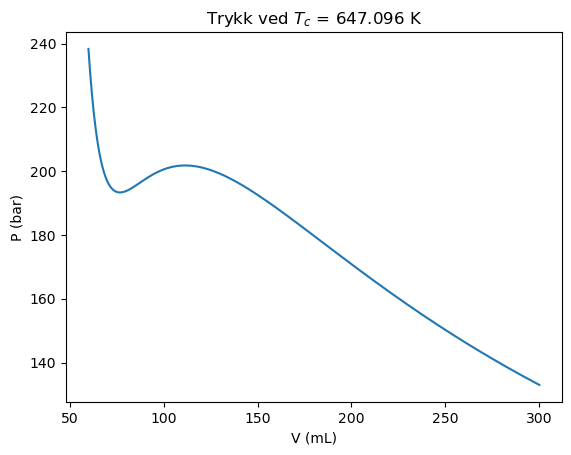

In [7]:
#1b)
n = 1            #mol
R = 0.081        #L bar/(K mol)
a = 5.534        #L^2 bar/mol^2
b = 0.03048      #L mol^-1
T_c = 647.096    #K
V = np.linspace(0.060, 0.300, 1000) #L
p = n*R*T_c/(V -n*b) - (a*n**2)/(V**2) 

plt.plot(V*1000, p)
plt.xlabel('V (mL)')
plt.ylabel('P (bar)')
plt.title(fr"Trykk ved $T_c$ = {T_c} K") 
plt.show()


Nå skal man løse denne likningen med newtons metode: 

$$
\sinh^2 \left(\frac{2c}{T_c}\right) -1 = 0
$$

Den deriverte med hensyn på $T_c$ vil da ha uttrykket:

$$
\frac{d}{dT_c}\left(\sinh^2 \left(\frac{2c}{T_c}\right) -1\right) = -\frac{4c\cosh\left(\frac{2c}{T_c}\right)\sinh\left(\frac{2c}{T_c}\right)}{T_c^2}
$$

$$
x_{k+1} = x_k − \frac{f(x_k)}{f'(x_k)}
$$


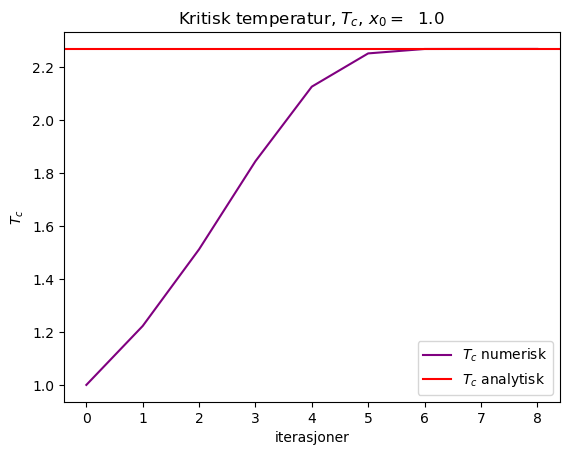

In [84]:
#1c)
c = 1 #K


def NewtonsMethod(maxIter, x_0, atol):
    x = np.zeros(maxIter)
    x[0] = x_0
    T_c = 2*c/(np.log(1+np.sqrt(2)))
    count = 0
    for i in range(maxIter-1):
        x[i+1] = x[i] - (np.sinh(2*c/x[i])**2-1)/((-4*c*np.cosh(2*c/x[i])*np.sinh(2*c/x[i]))/x[i]**2)
        count +=1
        if (np.abs(T_c-x[i+1]) < atol):
            break
            
    return count, x, np.linspace(0,maxIter-1,maxIter)

count, x, i = NewtonsMethod(1000, 1, 1e-10)
T_c = 2*c/(np.log(1+np.sqrt(2)))


plt.plot(i[:count+1], x[:count+1], color = "purple", label =  r"$T_c$ numerisk")
plt.axhline(T_c, color = "red", label = r"$T_c$ analytisk")
plt.xlabel("iterasjoner")
plt.ylabel(r"$T_c$")
plt.title(fr"Kritisk temperatur, $T_c$, $x_0 =$  {x[0]} ")
plt.legend()
plt.show()

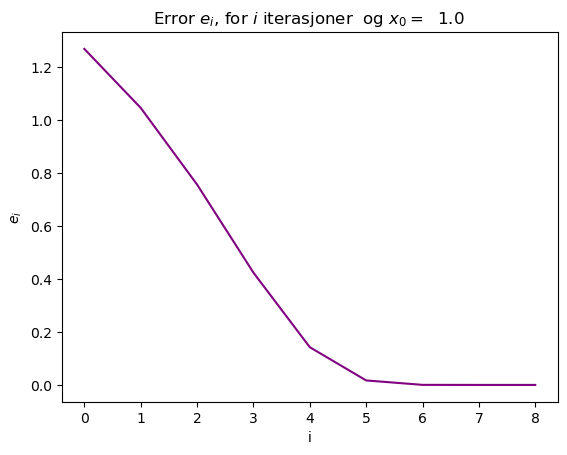

C:\Users\peder\AppData\Local\Temp\ipykernel_9788\1545290263.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  p_i[i]= np.log(e[i]/e[i-1])/np.log(e[i-1]/e[i-2])


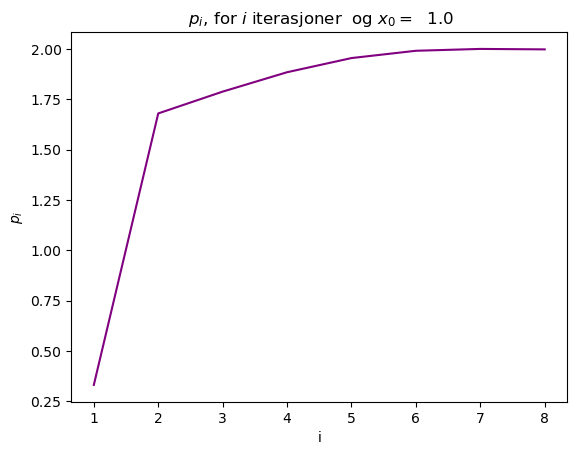

In [117]:
#1d)
e = np.abs(x - T_c)

count, x, w = NewtonsMethod(1000, 1, 1e-10)

plt.plot(w[:count+1], e[:count+1], color = "purple")
plt.xlabel("i")
plt.ylabel(r"$e_i$")
plt.title(fr"Error $e_i$, for $i$ iterasjoner  og $x_0 =$  {x[0]} ")
plt.show()


p_i = np.zeros(count+1)
for i in range(count+1):
    p_i[i]= np.log(e[i]/e[i-1])/np.log(e[i-1]/e[i-2])

        
plt.plot(w[:count+1], p_i, color = "purple")
plt.xlabel("i")
plt.ylabel(r"$p_i$")
plt.title(fr" $p_i$, for $i$ iterasjoner  og $x_0 =$  {x[0]} ")
plt.show()


Ser at $p_i$ konverderer mot 2 altså kan man fastslå at det er en superlineær konvergens med $q = 2$

Likning 11:
$$
p_0 = \frac{RT}{V_g-b}-\frac{a}{V_g^2} = \frac{RT}{V_v-b}-\frac{a}{V_v^2}
$$

Likning 12:
$$
\frac{RT}{V_g − V_v} ln \left( \frac{V_g − b}{V_v − b} \right) − \frac{a}{V_gV_v} = \frac{RT}{V_g − b}− \frac{a}{V_g^2}
$$